Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

Load File Data 

In [2]:
fifa = pd.read_csv('./Data/fifa_data.csv')

In [3]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Histogram

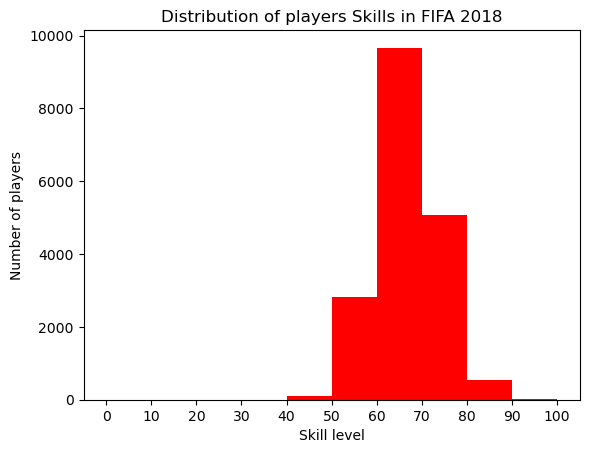

In [4]:
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(fifa.Overall , bins = bins , color= 'r')

plt.xticks(bins)

plt.ylabel('Number of players')
plt.xlabel('Skill level')
plt.title('Distribution of players Skills in FIFA 2018')

plt.show()

Pie Charts

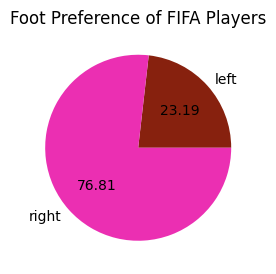

In [34]:
#Percentage of people who plays in right or left foot as they prefer
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count().iloc[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count().iloc[0]
#print(right)
plt.figure(figsize=(3,4))


plt.pie([left , right] , labels = ['left' , 'right'] , colors=['#87210E' , '#EB2FB2'] , autopct = '%.2f')

plt.title('Foot Preference of FIFA Players')

plt.show()

Pie Chart : 2

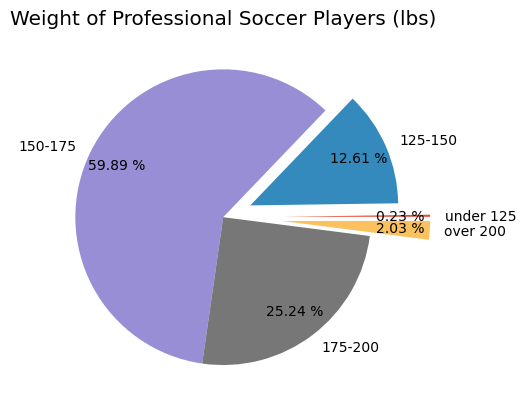

In [20]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count().iloc[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count().iloc[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count().iloc[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count().iloc[0]
heavy = fifa[fifa.Weight >= 200].count().iloc[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

Box And Whiskers Chat

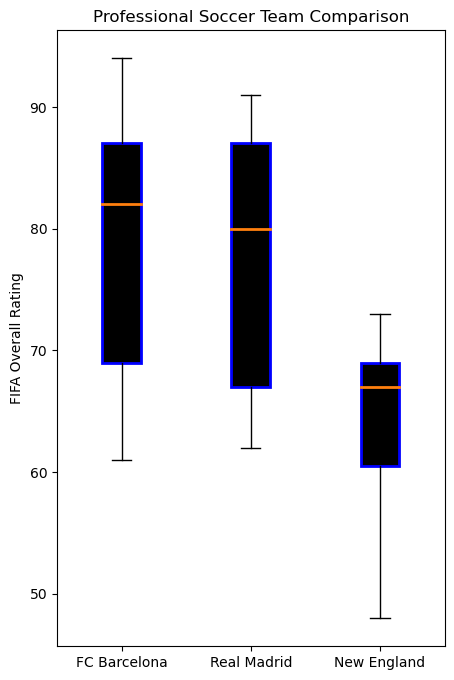

In [44]:
#How can we compaire two teams

plt.style.use('default')

plt.figure(figsize=[5,8])

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
Realmadrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

labels = ['FC Barcelona' , 'Real Madrid' , 'New England']

boxes = plt.boxplot([barcelona , Realmadrid , revs] , labels = labels , patch_artist=True , medianprops={'linewidth' : 2})

for box in boxes['boxes']:
    #set edge color
    box.set(color = 'blue' , linewidth=2)
    
    #change fill color
    box.set(facecolor = 'black')

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()